# K-Means Clustering

- Bank Transactions

### Step 1: Import Necessary Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load and Inspect the Dataset

In [44]:
# Load the dataset
data = pd.read_csv('bank_transactions.csv')

In [45]:
# Explore the dataset
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            20000 non-null  object 
 1   CustomerID               20000 non-null  object 
 2   CustomerDOB              19928 non-null  object 
 3   CustGender               19989 non-null  object 
 4   CustLocation             19999 non-null  object 
 5   CustAccountBalance       19973 non-null  float64
 6   TransactionDate          20000 non-null  object 
 7   TransactionTime          20000 non-null  int64  
 8   TransactionAmount (INR)  20000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


### Step 3: Data Preprocessing

In [47]:
# Convert the 'TransactionDate' column to datetime format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format='%d-%m-%Y')

In [48]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


In [49]:
# Drop rows with missing values
data.dropna(inplace=True)

In [50]:
# Select numeric features for clustering
numeric_features = data[['CustAccountBalance', 'TransactionAmount (INR)']]

In [51]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

### Step 4: Exploratory Data Analysis (EDA)

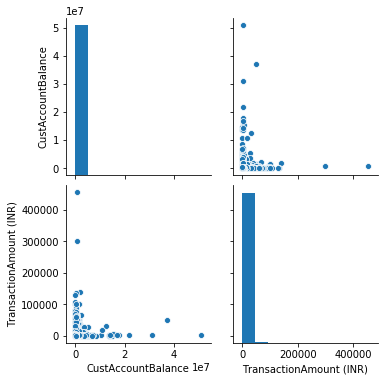

In [52]:
# Plot a pairplot to visualize relationships between numeric features
sns.pairplot(data[['CustAccountBalance', 'TransactionAmount (INR)']])
plt.show()

### Step 5: Finding the Optimal Number of Clusters (K)

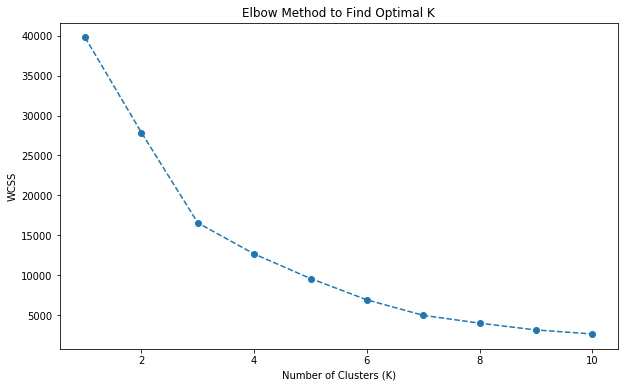

In [53]:
# Using the Elbow Method to find the optimal number of clusters (K)
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal K')
plt.show()

In [54]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

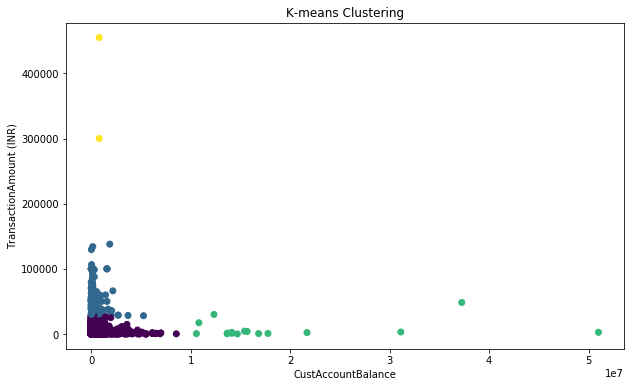

In [55]:
# Based on the Elbow Method, choose the optimal number of clusters (K)

# Visualize and Interpret the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['CustAccountBalance'], data['TransactionAmount (INR)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title('K-means Clustering')
plt.show()